<a href="https://colab.research.google.com/github/Raynould-Joseph/Neural-Network-and-Deep-Learning/blob/main/lab_7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MLP- multi layer perceptron

In [ ]:
import numpy as np
import pandas as pd

# Load data
data=pd.read_csv('/content/train_and_test2.csv')
data.head()


,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [ ]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', '2urvived'],
      dtype='object')

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()
data=data.drop(['zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6','zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14','zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18' ], axis=1)
print(data)

# Converting string labels into numbers.
# data['salary']=le.fit_transform(data['salary'])
# data['Departments ']=le.fit_transform(data['Departments '])

KeyError: ignored

In [ ]:
print(data.columns)

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', '2urvived'],
      dtype='object')


In [ ]:
data['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)

In [ ]:
# Spliting data into Feature and
X=data[['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass']]
y=data['2urvived']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [ ]:
np.any(np.isnan(data))

True

In [ ]:
data.fillna(NaN, inplace=True)

NameError: ignored

In [ ]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(1,7),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.58877176
Iteration 2, loss = 0.57459213
Iteration 3, loss = 0.56837795
Iteration 4, loss = 0.56800827
Iteration 5, loss = 0.56858398
Iteration 6, loss = 0.56839175
Iteration 7, loss = 0.56782049
Iteration 8, loss = 0.56720650
Iteration 9, loss = 0.56720923
Iteration 10, loss = 0.56716728
Iteration 11, loss = 0.56727141
Iteration 12, loss = 0.56729615
Iteration 13, loss = 0.56731208
Iteration 14, loss = 0.56719704
Iteration 15, loss = 0.56733530
Iteration 16, loss = 0.56727940
Iteration 17, loss = 0.56698259
Iteration 18, loss = 0.56696628
Iteration 19, loss = 0.56697769
Iteration 20, loss = 0.56687746
Iteration 21, loss = 0.56709376
Iteration 22, loss = 0.56690611
Iteration 23, loss = 0.56684077
Iteration 24, loss = 0.56676598
Iteration 25, loss = 0.56682205
Iteration 26, loss = 0.56671160
Iteration 27, loss = 0.56690658
Iteration 28, loss = 0.56668795
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(1, 7), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [ ]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.7251908396946565

#1. Build a BPN classifier for any kaggle dataset.

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as cma

In [ ]:
# Load dataset
data = load_iris()

# Get features and target
X=data.data
y=data.target

In [ ]:
# Get dummy variable 
y = pd.get_dummies(y).values

y[:3]
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)
# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update
    

In [ ]:
print("Accuracy",acc)

Accuracy 0.7076923076923077


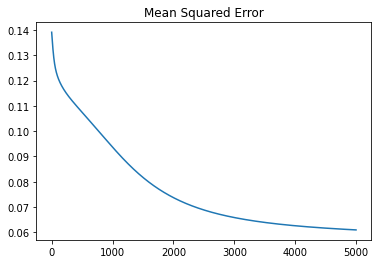

In [ ]:
results.mse.plot(title="Mean Squared Error")

#RBF Network - Radial basis function

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as cma
import math, random

iris = datasets.load_iris()
X = iris.data
y = list(iris.target + 1)

hidden_nodes = 10

"""fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()"""

est = KMeans(n_clusters=hidden_nodes)
est.fit(X)

"""labels = est.labels_
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')"""
cluster_ctr = est.cluster_centers_
print("cluster centroids",cluster_ctr)
#print X
#plt.show()

#new_data = np.array(shape = ())
f_res = []
for i in X:
    res = []
    #print "original data point",i
    for j in cluster_ctr:
        temp = []
        for x, z in zip(i, j):
            temp.append(x - z)
        #print "data subtracted from mu", temp
        temp = np.array(temp)
        res.append(math.exp(-np.dot(temp, temp.T)/2))
    #print "higher dimensional representation of the original data point", res
    f_res.append(res)

#print "final data form",f_res

final_data = np.full((150,hidden_nodes+2), 0.0)
eta = .1

for k in range(150):
    temp = [1]
    temp = np.concatenate((temp, f_res[k], [y[k]]))
    #print "prepared temp", temp
    final_data[k] = temp
#final_res = np.array(final_res)
# print ("final data with label",final_data)
# print ("shape of final data", final_data.shape)

train_data = np.zeros(shape=(120,hidden_nodes+2))
test_data = np.zeros(shape=(30,hidden_nodes+2))
l = k = 0
for i in range(150):
    if i % 5 == 0:
        test_data[l] = final_data[i]
        l += 1
    else:
        train_data[k] = final_data[i]
        k+= 1

print ("train data", train_data.shape)
print ("test data", test_data.shape)

#initial weights
u_weights = np.array([[random.uniform(-10, 10) for i in range(hidden_nodes+1)], [random.uniform(-10, 10) for i in range(hidden_nodes+1)],
                      [random.uniform(-10, 10) for i in range(hidden_nodes+1)]])
print (u_weights)

#matrix of weights in the last iteration, required for the termination condition
l_weights = np.full((3, (hidden_nodes + 1)), 0.0)

def train_model(label):
    print ('for class : ', label)
    pdt = 0
    l_weights = np.full((3, (hidden_nodes + 1)), 0.0)
    # print ('l_weights are', l_weights[label - 1])
    # print ('u_weights are', u_weights[label - 1])
    # class label >= 0 vs class non-label < 0 - online learning
    #while (abs(l_weights[label - 1] - u_weights[label - 1]).any() > .0001):
    count = 20
    while count > 0:
        print ("count: ", 20 - count)
        #l_weights[label - 1] = u_weights[label - 1]

        # show_plot(formula, x_range)
        # print ('training data and weight vector and pdt is :', final_data[0, :-1], u_weights[label - 1]\
        #     , np.dot(final_data[0, :-1], np.transpose(u_weights[label - 1])))

        for i in train_data:
            print ('initial weights and data vector',(u_weights, i[:-1]))
            pdt = np.dot(i[:-1], np.transpose(u_weights[label - 1]))
            print ('product is ',pdt)
            if (i[-1] != label and pdt >= 0):
                u_weights[label - 1] = u_weights[label - 1] - eta * i[:-1]
                print ("first case : label is ",label, "wt and data", (u_weights[label-1], eta*i[:-1]))

            if (i[-1] == label and pdt < 0):
                u_weights[label - 1] = u_weights[label - 1] + eta * i[:-1]
                print ("second case label is ",label, "wt and data", (u_weights[label-1], eta*i[:-1]))
        #print 'abs diff', abs(l_weights[label - 1] - u_weights[label - 1])
        count -= 1

def accuracy(y_pred, y_true):
    acc = np.array(y_pred).argmax(axis=0) == np.array(y_true).argmax(axis=0)
    return acc.mean()

def predict_model(test_data):
    pred = [None]*30
    count = 0
    #print "sayandeep",self.test_data
    for i in test_data:
        t_pdt_1 = np.dot(i[:hidden_nodes + 1], np.transpose(u_weights[0]))
        t_pdt_2 = np.dot(i[:hidden_nodes + 1], np.transpose(u_weights[1]))
        t_pdt_3 = np.dot(i[:hidden_nodes + 1], np.transpose(u_weights[2]))
        print (count,"printings",t_pdt_1, t_pdt_2, t_pdt_3)
        if t_pdt_1 >= 0:
            pred[count] = 1
        elif t_pdt_2 >= 0:
            pred[count] = 2
        elif t_pdt_3 >= 0:
            pred[count] = 3
        else:
            pred[count] = 0
        count += 1
    #print self.prediction
    cm = cma.confusion_matrix(test_data[:, -1], pred)
    print("------------------------------------------")
    print ('confusion matrix for the model is', cm)
    print (pred)
    print("accuracy is ",accuracy(test_data, pred)*100)

train_model(1)
train_model(2)
train_model(3)

print ("final weights learned", u_weights)
predict_model(test_data)

Streaming output truncated to the last 5000 lines.
       0.9424829 , 0.02074793, 0.58716248, 0.00668974, 0.91746043,
       0.41039917]))
product is  -2.110517610073267
initial weights and data vector (array([[ 4.14846676, -1.89500809, -4.67235982,  2.72522899, -3.23551228,
         5.92218524, -3.38061366, -8.75632565,  1.08297729, -9.49442025,
        -4.95440542],
       [-3.38290419, -5.96837547, -5.89817926,  5.07338273, -2.16567945,
         1.63102096,  4.84095348, -4.5024756 , -5.22827382,  3.14562486,
         8.97081393],
       [ 2.99727907,  3.33193045,  0.06232577, -4.29245081, -7.04162544,
        -8.84581956,  4.61188417,  1.31875756, -9.23739504,  7.84398711,
        -2.40089402]]), array([1.        , 0.01891542, 0.00556711, 0.84293279, 0.29452952,
       0.77783761, 0.05329167, 0.65982077, 0.00270259, 0.94776771,
       0.23151167]))
product is  -1.5427779026414852
initial weights and data vector (array([[ 4.14846676, -1.89500809, -4.67235982,  2.72522899, -3.23551228